In [14]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [21]:
# Create our session (link) from Python to the DB
sess = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
from sqlalchemy import desc
date = sess.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(date)

('2017-08-23',)


In [23]:
from sqlalchemy import extract, func
year_data = sess.query(Measurement).filter(Measurement.date<='2017-08-23',Measurement.date>='2016-08-23')

conn = engine.connect()
year_data = pd.read_sql("SELECT * FROM Measurement", conn)
year_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [24]:
sel = [Measurement.date,Measurement.prcp]
year_data = sess.query(*sel).filter(Measurement.date<='2017-08-23',Measurement.date>='2016-08-23')

conn = engine.connect()
year_data = pd.DataFrame(year_data,columns=['date','prcp'])
year_data.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


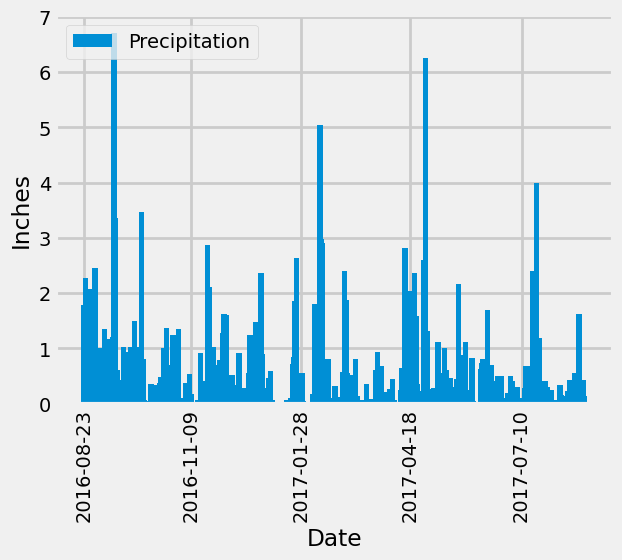

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
year_data = sess.query(*sel).filter(Measurement.date<='2017-08-23',Measurement.date>='2016-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
year_data = pd.DataFrame(year_data,columns=['date','prcp'])
year_data.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
index = ['2016-08-23','2016-11-09','2017-01-28','2017-04-18','2017-07-10']
plt.bar(year_data['date'],year_data['prcp'],width=4)
plt.xticks(index,rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['Precipitation'],loc='upper left')
plt.grid(linestyle='-', linewidth=2)
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_data.describe().round(3)

,prcp
count,2021.000
mean,0.177
std,0.461
min,0.000
25%,0.000
50%,0.020
75%,0.130
max,6.700


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
stations = sess.query(Station.station).count()
stations

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = sess.query(func.count(), Measurement.station).group_by(Measurement.station).order_by(desc(func.count())).all()
for count, value in station_activity:
    print(f"{value}: {count}")

USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data_max = sess.query(func.max(Measurement.tobs),Measurement.tobs).filter(Measurement.station =='USC00519281')
for count, value in temp_data_max:
    max_temp = value

temp_data_min = sess.query(func.min(Measurement.tobs),Measurement.tobs).filter(Measurement.station =='USC00519281')
for count, value in temp_data_min:
    min_temp = value

temp_data_avg = sess.query(func.avg(Measurement.tobs),Measurement.tobs).filter(Measurement.station =='USC00519281')
for count, value in temp_data_avg:
    avg_temp = value

print(f"Max temp: {max_temp}")
print(f"Min temp: {min_temp}")
print(f"Avg temp: {avg_temp}")

Max temp: 85.0
Min temp: 54.0
Avg temp: 70.0


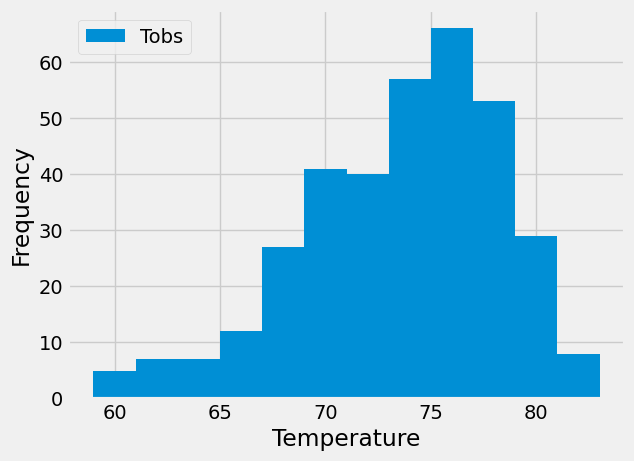

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date,Measurement.tobs]
year_data = sess.query(*sel).filter(Measurement.station =='USC00519281', Measurement.date<='2017-08-23',Measurement.date>='2016-08-23')
year_data = pd.DataFrame(year_data,columns=['date','tobs'])
#year_data.dropna()


plt.hist(year_data['tobs'],bins=12)
plt.yticks(np.arange(0,70,10))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['Tobs'],loc='upper left')
plt.show()

# Close Session

In [31]:
# Close Session
sess.close()